In [2]:
import numpy as np
from matplotlib import pyplot as plt
import json
import os

In [3]:
root_folder = "/Users/cafr02/datasets"

In [4]:
results_file = "logs/baseline/1693231933/eval/ser-audeering-w2v-baseline/ravdess.txt"
dims = list()
paths = list()
with open(results_file, "r") as f:
    f.readline()
    for line in f:
        line = line.strip().split(" ")
        paths.append(line[0])
        dims.append([float(x) for x in line[1:]])
dims = np.array(dims)
print(dims.shape)

(1440, 3)


In [5]:
datafile = "data/ravdess/ravdess.txt"
labels = dict()
with open(datafile, "r") as f:
    for line in f:
        obj = json.loads(line)
        obj_id = obj["audio_filepath"].replace("{root}", root_folder)
        labels[obj_id] = dict()
        for key in obj:
            if key != "audio_filepath":
                labels[obj_id][key] = obj[key]


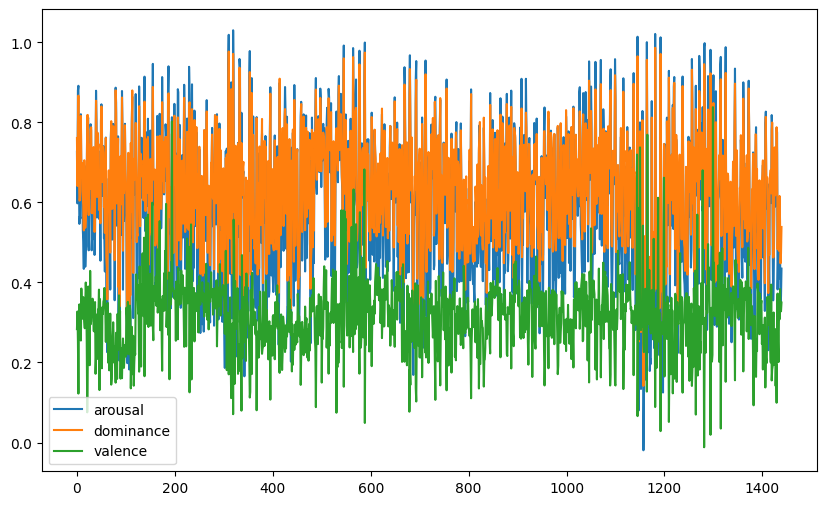

In [6]:
plt.figure(figsize=(10, 6))
plt.plot(dims[:, 0], label="arousal")
plt.plot(dims[:, 1], label="dominance")
plt.plot(dims[:, 2], label="valence")
plt.legend()

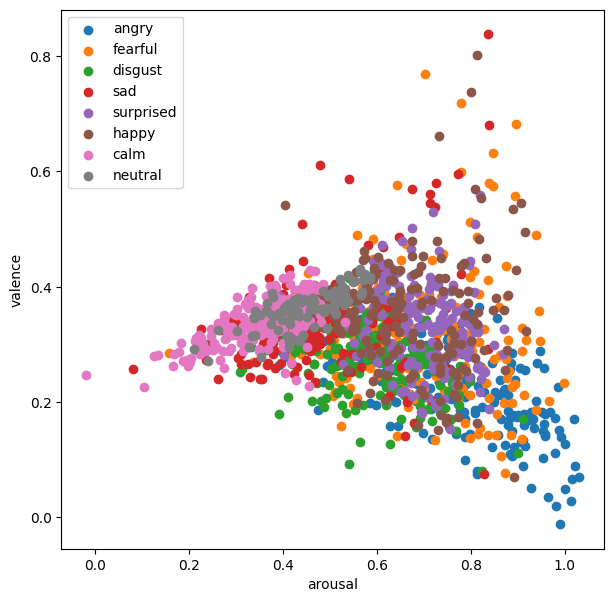

In [7]:
plt.figure(figsize=(7, 7))

group_key = "utt_emotion"
groups = dict()
for idx, path in enumerate(paths):
    group_value = labels[path][group_key]
    if group_value not in groups:
        groups[group_value] = list()
    groups[group_value].append(idx)

for group_value, indices in groups.items():
    plt.scatter(dims[indices, 0], dims[indices, 2], label=group_value)

plt.legend()
plt.xlabel("arousal")
plt.ylabel("valence")
plt.show()